In [1]:
import torch

## STEP 1 데이터 만들기


In [15]:
# meshgrid() 관련
# 격자를 서로 합쳐준다고 생각하자 (x, y) 형태의 데이터를 만들 때 활용한다
x1 = torch.linspace(-10, 10, 10)
x2 = torch.linspace(-10, 10, 10)

# print(x1, x2)

x1_meshed, x2_meshed = torch.meshgrid(x1, x2)
# x1_Test = torch.cat([x1_meshed.unsqueeze(dim=2), x2_meshed.unsqueeze(dim=2)], dim=2)
x1_Test = torch.unsqueeze(x1_meshed, dim = 2)
print(x1_Test.shape)

torch.Size([10, 10, 1])


In [7]:
# case 1
# N=20
# random0=torch.randn(int(N/2),1) # (10,1) 채널이 1개인 10개의 데이터
# random5=torch.randn(int(N/2),1)+5
# class1_data=torch.hstack([random0,random5])
# class2_data=torch.hstack([random5,random0])
# class1_label=torch.ones(int(N/2),1)
# class2_label=torch.zeros(int(N/2),1)
# X=torch.vstack([class1_data,class2_data])
# y=torch.vstack([class1_label,class2_label])

# case 2 (과제 - simple network 구성하기 관련)
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

In [ ]:
print(X.shape)
print(y.shape)

torch.Size([20, 2])
torch.Size([20, 1])


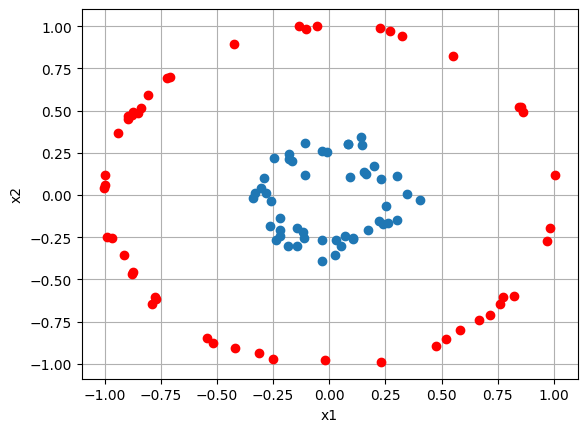

In [8]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP 2 모델 만들기

In [ ]:
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(5)])
#nn.Sequential(*[nn.Linear(100,100) if i%2 == 0 else nn.Sigmoid() for i in range(10)])

# 실제 다양한 층을 활용해야 하는 상황
module_list=[]
module_list.append()
nn.Sequential(*module_list)

# 이중 List를 활용하는 경우 - 빈 리스트 하나 만들고 append 해서 적용하는 방식
# empty_list = []
# for _ in range(5):
#     for i in [nn.Linear(100,100), nn.Sigmoid()]:
#         empty_list.append(i)

# 하나의 문장으로 표현하면 다음처럼 표현이 가능하다

print([i for _ in range(5) for i in [nn.Linear(100,100), nn.Sigmoid()]])

[Linear(in_features=100, out_features=100, bias=True), Sigmoid(), Linear(in_features=100, out_features=100, bias=True), Sigmoid(), Linear(in_features=100, out_features=100, bias=True), Sigmoid(), Linear(in_features=100, out_features=100, bias=True), Sigmoid(), Linear(in_features=100, out_features=100, bias=True), Sigmoid()]


In [27]:
import torch
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain 한 경우 (Hidden layer가 한 개만 존재하는 경우)
        # 데이터는 현재 20 x 2 형태이므로
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

        # case 2 (과제) - very simple 한 경우 (Hidden Layer 조차 존재하지 않는 경우)
        # 이런 상황에서 어떻게 학습효과를 높일 수 있을지 고민해야 한다
        self.linear = nn.Sequential(nn.Linear(2,1),
                                    nn.Sigmoid())

        # case 3 (deep) - deep 한 모델도 생각을 해보자 (Hidden Layer를 더 늘린 상황)
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

        # case 4 (very deep) - deep 한 모델도 생각을 해보자 (Hidden Layer를 더 늘린 상황)
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Sequential(*[i for _ in range(10)
                                                    for i in [nn.Linear(100,100),
                                                                nn.Sigmoid()]]),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

        # case 5 ReLu()를 활용한 deep 모델
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.ReLU(),
                                    nn.Sequential(*[i for _ in range(10)
                                                    for i in [nn.Linear(100,100),
                                                                nn.ReLU()]]),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

    def forward(self, x):
        x=self.linear(x)
        return x


model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # ( x1, x2 ) 형태로 구성된 데이터 5개를 입력했다

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=100, bias=True)
      (5): ReLU()
      (6): Linear(in_features=100, out_features=100, bias=True)
      (7): ReLU()
      (8): Linear(in_features=100, out_features=100, bias=True)
      (9): ReLU()
      (10): Linear(in_features=100, out_features=100, bias=True)
      (11): ReLU()
      (12): Linear(in_features=100, out_features=100, bias=True)
      (13): ReLU()
      (14): Linear(in_features=100, out_features=100, bias=True)
      (15): ReLU()
      (16): Linear(in_features=100, out_features=100, bias=True)
      (17): ReLU()
      (18): Linear(in_features=100, out_features=100, bias=True)
      (19): ReLU()
    )
    (3): Linear(in_features=100, out_f

## STEP 3 모델 학습시키기

In [28]:
# 관련된 optimizer들을 확인할 수 있다
from torch import optim
import torch.nn.functional as F

LR = 1e-1 # 1/10 -> e-1 = 10^(-1) 을 하는 것과 동일함 - case 1
EPOCH = 100 # case 1

LR = 1e-2 # 1/100 -> e-1 = 10^(-2) 을 하는 것과 동일함 - case 2
EPOCH = 500 # case 2 - deep 한 경우

# LR = 1e-4 # very deep relu

# optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR)

loss_history = []
model.train() # train mode로 변경
for ep in range(EPOCH):
    # inference
    # X = (20,2) 형태의 데이터, 이와 관련된 레이블은 Y에 담겨져 있다
    y_hat = model(X)
    # Loss Function - BCE(machine_output(y_hat), labeled Data(y) ) - 순서 유의해야 한다
    loss = F.binary_cross_entropy(y_hat, y)

    # update - 여러번 반복하면서 고인 곳으로 이동하게 만든다
    optimizer.zero_grad() # optimizer에서 grad의 누적을 막는 방법도 가지고 있다
    loss.backward() # Gradient를 구하게 되는 과정 (backPropagation = backward()로 진행한다)
    optimizer.step() # 이동한다 (weight update)

    # loss_history에 추가한다 (리스트 간의 연결로 추가하는 방식을 택함)
    loss_history += [loss.item()]

    print(f"Epoch: {ep+1}, train loss : {round(loss.item(), 3)}")
    print("-" * 20)


Epoch: 1, train loss : 0.695
--------------------
Epoch: 2, train loss : 0.693
--------------------
Epoch: 3, train loss : 0.693
--------------------
Epoch: 4, train loss : 0.693
--------------------
Epoch: 5, train loss : 0.686
--------------------
Epoch: 6, train loss : 0.648
--------------------
Epoch: 7, train loss : 0.607
--------------------
Epoch: 8, train loss : 0.558
--------------------
Epoch: 9, train loss : 0.544
--------------------
Epoch: 10, train loss : 0.342
--------------------
Epoch: 11, train loss : 0.32
--------------------
Epoch: 12, train loss : 0.392
--------------------
Epoch: 13, train loss : 0.295
--------------------
Epoch: 14, train loss : 0.283
--------------------
Epoch: 15, train loss : 0.275
--------------------
Epoch: 16, train loss : 0.381
--------------------
Epoch: 17, train loss : 0.212
--------------------
Epoch: 18, train loss : 0.139
--------------------
Epoch: 19, train loss : 0.067
--------------------
Epoch: 20, train loss : 5.502
-----------

In [18]:
print(F.binary_cross_entropy(y_hat, y))
print(-torch.sum(torch.log(y_hat**y * (1-y_hat)**(1-y)))/ N)

tensor(0.0001, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0001, grad_fn=<DivBackward0>)


Text(0, 0.5, 'Loss')

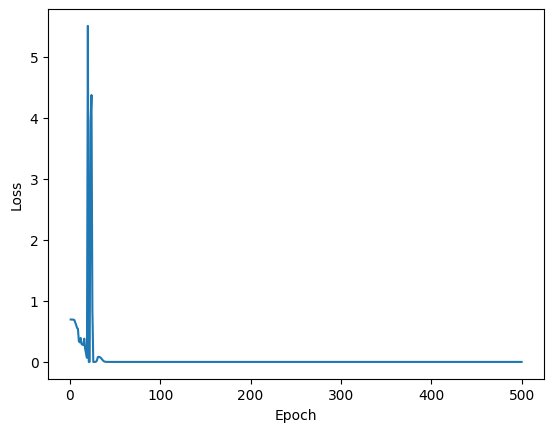

In [29]:
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Grad는 기본적으로 누적되는 형태

x.grad=None을 활용하자

In [ ]:
x = torch.tensor([1.], requires_grad = True)
for _ in range(3):
    y=x**2
    y.backward()
    print(x.grad)
    # x.grad=None

tensor([2.])
tensor([4.])
tensor([6.])


In [ ]:
# Grad는 기본적으로 누적되서 진행되는 형태이다
x = torch.tensor([1.], requires_grad = True)
for _ in range(2):
    loss = x**2
    loss.backward()
    print(x.grad)
    x.grad=None

tensor([2.])
tensor([2.])


## STEP 4 모델 테스트하기

In [ ]:
x1_test, x2_test = torch.meshgrid(torch.linspace(-10, 10, 3), torch.linspace(-10, 10, 3))
print(x1_test)
print(x2_test)

tensor([[-10., -10., -10.],
        [  0.,   0.,   0.],
        [ 10.,  10.,  10.]])
tensor([[-10.,   0.,  10.],
        [-10.,   0.,  10.],
        [-10.,   0.,  10.]])


In [20]:
# 두 개의 피처를 지닌 데이터를 형성하려고 한다
# torch.linspace()를 활용해서 feature 각각의 값을 구성한다고 생각하면되고
# 아래의 경우 -10, -10 에서 10, 10 까지 30개를 만들어낸다고 생각하면 되겠다

x1_test = torch.linspace(-10, 10, 30) # case 1
x2_test = torch.linspace(-10, 10, 30) # case 1

x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2

X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
# print(X1_test.shape)
# print(X1_test.unsqueeze(dim=2).shape) # dimension 추가, 2번째 차원에 추가한다는 의미

X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2) # 방향을 설정하고, 해당 방향으로 cat 이어붙여준다는 의미
# print(X_test.shape) # 30 30 2 ( 개 개 채 ) 형태로 만들어주기 위함

model.eval() # test 모드로 전환
with torch.no_grad():
    # 최종적으로 한 개의 채널로 값이 나오기 때문에 채널은 1, 개수였던 30 x 30 이기 때문에 전체 shape은 30 x 30 x 1 형태가 된다
    y_hat = model(X_test)
Y_hat = y_hat.squeeze() # 30 x 30 형태가 되어야 그림을 그릴 수 있다고 한다

Text(0.5, 0.5, 'x2')

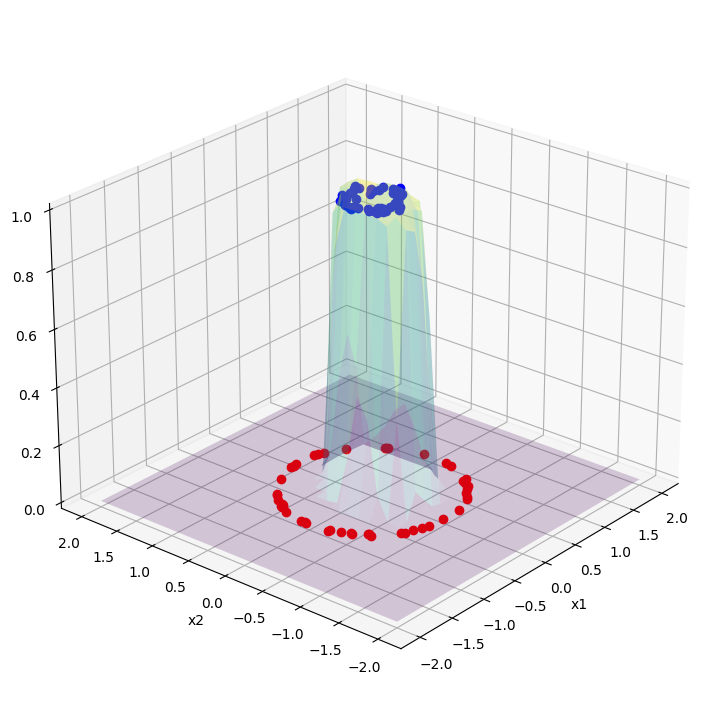

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)